# Статистический анализ данных / Python
## Задание 1

**Правила:**

* Дедлайн **17 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 1"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

### Задача 1. (5 баллов)

Пусть $X_1, ..., X_n$ --- выборка из равномерного распределения на отрезе $[0, \theta]$. На занятии было получено, что оценка $X_{(n)}$ является оценкой максимального правдоподобия параметра $\theta$. Покажите, что она является состоятельной оценкой $\theta$:

$$\mathsf{P}_{\theta}(X_{(n)} < \theta - \varepsilon) = ...$$

*Указание.* Вспомните определение $X_{(n)}$ и воспользуйтесь независимостью.

В чем практический смысл состоятельности?

**Ответ:** 
При увеличении количества наблюдений повышается уверенность в том, что оценка отличается от реального значения мало

Оценка $X_{(n)}$ не является асимптотически нормальной, но в данном случае можно доказать свойство круче:
$$n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right).$$  
Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них оценку $X_{(n)}$ параметра $\theta$ в зависимости от размера выборки и визуализировав рассматриваемое свойство.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из равномерного распределения на отрезке $[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $T_{jn} = n \left( \theta - \widehat{\theta}_{jn} \right)$, где $\theta = 1$.

In [2]:
import numpy as np

#Сгенерируйте множество выборок
X_sets = list()
for i in range(300):
    X_sets.append(np.random.uniform(0, 1, 500))

In [3]:
# По каждой из них посчитайте оценки
T_list=list()
Q_list=list()
#берём один набор Х
for X_set in X_sets:
    set_T_estimations = list()
    set_Q_estimations = list()
    # оценку параметра  Q  по первым  n наблюдениям
    for n in range(1, len(X_set)+1):
        Q_jn = np.max(X_set[:n])
        #Статистика Т
        T_jn = n * (1 - Q_jn)
        set_T_estimations.append(T_jn)
        set_Q_estimations.append(Q_jn)
    T_list.append(set_T_estimations)  
    Q_list.append(set_Q_estimations)  

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Все кривые должны быть нарисованы *одним и тем же цветом* с прозрачностью `alpha=0.1`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

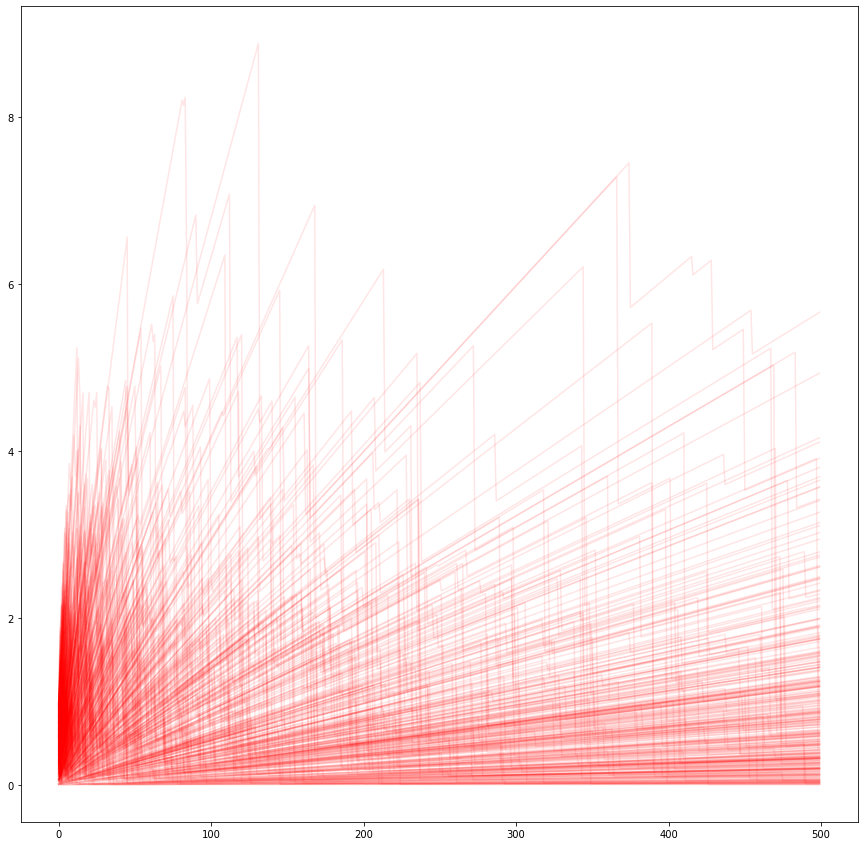

In [4]:
plt.figure(figsize=[15,15])
for T_j in T_list:
    plt.plot(T_j, alpha=0.1, c='r')

**Ответ:** сходятся к 0

Для $n=500$ по выборке $T_{1,500}, ..., T_{300,500}$ постройте гистограмму и график плотности распределения $Exp(1)$.  Не забудьте сделать легенду.

In [5]:
T_n_500 = list()
for T_j in T_list:
    T_n_500.append(T_j[499])

In [6]:
x = np.linspace(sps.expon.ppf(0.01), sps.expon.ppf(0.99), 100)

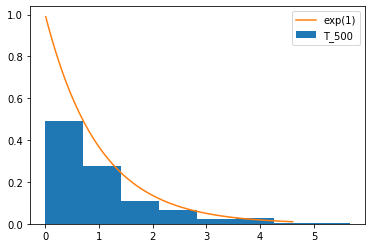

In [7]:
plt.hist(T_n_500, bins=8, weights=np.ones(len(T_n_500)) / len(T_n_500), label='T_500')
plt.plot(x, sps.expon.pdf(x), label='exp(1)')
plt.legend()
#plt.plot(x, sps.expon.pdf(x))

Сделайте вывод по задаче и ответьте на вопросы:
* Хорошо ли гистограмма приближает плотность распределения $Exp(1)$? 
* Подтверждают ли проведенные эксперименты свойство $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$?
* Чем это свойство круче асимптотической нормальности и как это может быть полезно на практике?

**Вывод:** 
- Да, хорошо
- Подтверждают
- 
<...>

### Задача 2. (5 баллов)
В этом задании нужно сделать оценку ОМП для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.


Скачайте данные по ссылке http://archive.ics.uci.edu/ml/machine-learning-databases/wine и загрузите их с помощью библиотеки pandas

In [8]:
columns_ = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
           'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline' ]

In [9]:
data = pd.read_csv('data/wine.data', header = None)
data.columns = columns_
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Пусть выборка $(X_1, \dots, X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со вектором средних $\mu \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.
Можно показать, то оценками максимального правдоподобия являются
$$\widehat{\mu} = \overline{X},\ \ \ \widehat{\Sigma}=\frac{1}{n}\sum_{i=1}^n \left(X_i - \widehat{\mu}\right)\left(X_i - \widehat{\mu}\right)^T$$

Рассмотрим колонки "Alcalinity of ash", "Proanthocyanins", "Hue". Предположим, что
данные в них образуют выборку из многомерного нормального распределения с неизвестными
параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что
данные визуально похожи на нормальное распределение:

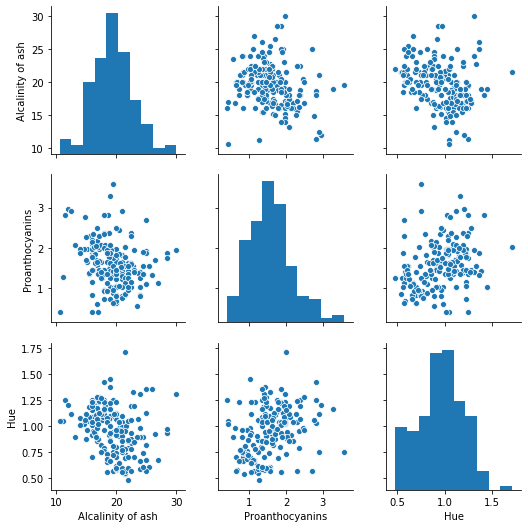

In [10]:
sns.pairplot(data[["Alcalinity of ash", "Proanthocyanins", "Hue"]])

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $\mu$ и матрицы ковариаций $\Sigma$ по выборке:

In [85]:
def mle_for_mean(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    """
    return np.array(np.sum(sample) / len(sample))

mle_for_mean(data[["Alcalinity of ash", "Proanthocyanins", "Hue"]])

array([19.49494382,  1.59089888,  0.95744944])

In [96]:
def mle_for_covariance_matrix(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    """
    #return np.cov(sample)
    mu = mle_for_mean(sample)
    n = sample.shape[0]
    
    v = sample - mu
    return np.dot(np.transpose(v), v) / n

mle_for_covariance_matrix(data[["Alcalinity of ash", "Proanthocyanins", "Hue"]])

array([[11.09003061, -0.37505725, -0.20794323],
       [-0.37505725,  0.32575425,  0.03844735],
       [-0.20794323,  0.03844735,  0.05195145]])

In [97]:
mu = data[["Alcalinity of ash", "Proanthocyanins", "Hue"]].apply(mle_for_mean)
sigma = data[["Alcalinity of ash", "Proanthocyanins", "Hue"]].apply(mle_for_covariance_matrix)

Визуализируйте полученный результат. Для каждой пары признаков постройте график, на котором будут:

1) Точки выборки

2) Плотность нормального распредления с оцененными параметрами в виде линий уровня

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

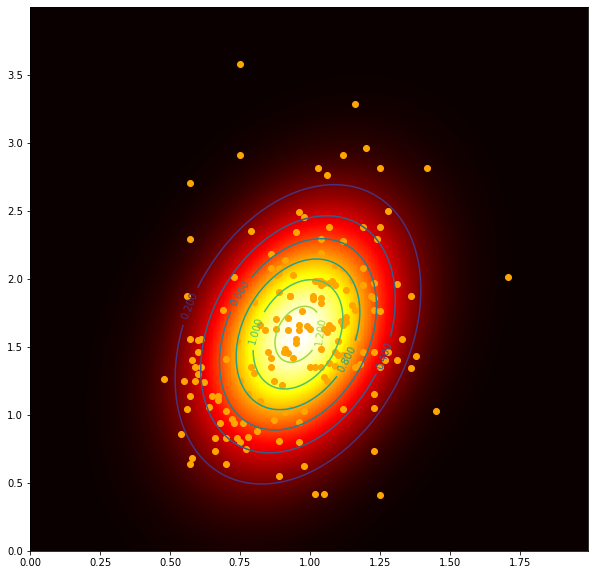

In [132]:
def plot_result(sample, target_columns, fig_size=[15,15]):
    if len(target_columns)!=2:
        raise BaseException ('Target columns must have length = 2')
    x_min = int(np.floor(np.min(sample[target_columns[0]])))
    x_max = int(np.ceil(np.max(sample[target_columns[0]])))
    
    y_min = int(np.floor(np.min(sample[target_columns[1]])))
    y_max = int(np.ceil(np.max(sample[target_columns[1]])))
    
    x, y = np.mgrid[x_min:x_max:.005, y_min:y_max:.005]
    
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    
    x_mean = mle_for_mean(sample[target_columns[0]])
    y_mean = mle_for_mean(sample[target_columns[1]])
    
    cov_matrix = mle_for_covariance_matrix(sample[target_columns])
    
    rv = sps.multivariate_normal([x_mean, y_mean], cov_matrix)
    #plt.contourf(x, y, rv.pdf(pos))
    
    
    plt.figure(figsize=fig_size)
    plt.pcolormesh(x, y, rv.pdf(pos), cmap='hot')
    
    CS = plt.contour(x, y, rv.pdf(pos))
    plt.clabel(CS)

    plt.scatter(sample[target_columns[0]], data[target_columns[1]], color='orange')
    
    

plot_result(data, ['Hue', 'Proanthocyanins'], [10,10])

In [129]:
plt.clabel()

TypeError: clabel() missing 1 required positional argument: 'CS'

In [ ]:
<...>

Сделайте вывод по задаче и предложите способ уточнения модели, возможно, добавив другие признаки.

**Выводы:** <...>